In [1]:
import os
import pandas as pd

In [2]:
os.chdir('..')

# Report

In [3]:
data = pd.read_csv('data_ptb-xl/ptbxl_database.csv', encoding='utf-8')
data.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [4]:
data['validated_by_human'].value_counts()

validated_by_human
True     16056
False     5743
Name: count, dtype: int64

In [5]:
data['initial_autogenerated_report'].value_counts()

initial_autogenerated_report
False    14986
True      6813
Name: count, dtype: int64

In [6]:
mask = data['report'].str.contains('4.46')
len(data[mask])

7038

In [7]:
data[mask].initial_autogenerated_report.value_counts()

initial_autogenerated_report
True     6813
False     225
Name: count, dtype: int64

In [8]:
data[mask].validated_by_human.value_counts()

validated_by_human
False    5743
True     1295
Name: count, dtype: int64

In [11]:
mask = data['report'].str.contains('4.46') & (data['initial_autogenerated_report'] == False)
data[mask]['report']

4513     sinusrhythmus linkstyp periphere niederspannun...
4541     vorhofflimmern/-flattern ueberdrehter linkstyp...
4907     sinusrhythmus a-v block i lagetyp normal qrs(t...
5003     tachykardes vorhofflimmern lagetyp normal mÄss...
5008     sinusrhythmus mÖglicherweise wpw typ b linksty...
                               ...                        
21703    tachykardes vorhofflimmern linkstyp qrs(t) abn...
21718    tachykardes vorhofflimmern linkstyp qrs(t) abn...
21725    sinusrhythmus verdacht auf p-sinistrocardiale ...
21727    ventrikulÄre extrasystole(n) sinustachykardie ...
21789    ventrikulÄre extrasystole(n) sinusrhythmus lin...
Name: report, Length: 225, dtype: object

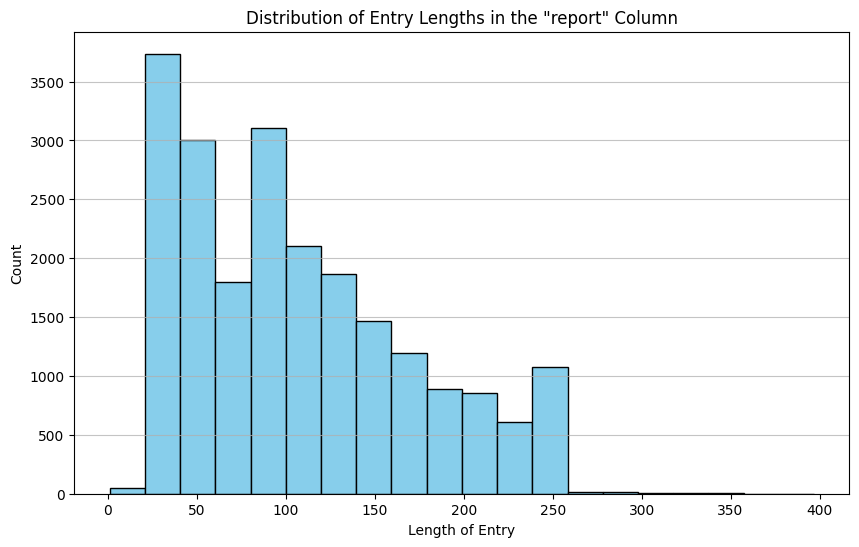

In [12]:
import matplotlib.pyplot as plt

data['length'] = data['report'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(data['length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Entry Lengths in the "report" Column')
plt.xlabel('Length of Entry')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [13]:
max(data['length'])

397

In [17]:
data.loc[data['length'] == 397]['report']

3783    sinusbradykardi extrem vÄnster el-axel ospecif...
Name: report, dtype: object

In [18]:
data['length'].value_counts()

length
25     1738
41     1589
93     1399
255     708
26      689
       ... 
311       1
289       1
304       1
346       1
259       1
Name: count, Length: 280, dtype: int64

In [19]:
data.loc[data['length'] == 255]['report']

38       sinusrhythmus linkstyp qrs(t) abnormal    infe...
173      ventrikulÄr(a) extrasystoli(er) fÖrmaksflimmer...
249      premature atrial contraction(s). sinus rhythm....
263      premature atrial contraction(s). sinus rhythm....
266      sinus rhythm. possible left atrial enlargement...
                               ...                        
21718    tachykardes vorhofflimmern linkstyp qrs(t) abn...
21725    sinusrhythmus verdacht auf p-sinistrocardiale ...
21727    ventrikulÄre extrasystole(n) sinustachykardie ...
21788    ventrikulÄre extrasystole(n), trigeminus supra...
21789    ventrikulÄre extrasystole(n) sinusrhythmus lin...
Name: report, Length: 708, dtype: object